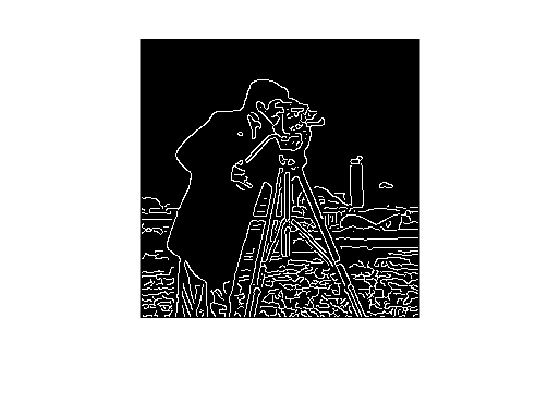

In [44]:
I = imread('cameraman.tif');
% I = rgb2gray(I);
edgeI = edge(I,'canny');
imshow(edgeI)

In [45]:
[m,n] = size(edgeI);
a = 180; % theta from 1 to 180 degrees
r = round(sqrt(m^2+n^2));% the maximum length of rho

hough_voting = zeros(a, 2*r);
hough_axis = cell(a, 2*r);

[row, col] = find(edgeI);
for i = 1:length(row)
  for k = 1:a
     p = row(i)*cos(k*pi/180) + col(i)*sin(k*pi/180);
     p = round(p);
     if p > 0 
       hough_voting(k,r+p) = hough_voting(k,r+p) + 1; %save current point in space (r,2*r)
       hough_axis{k,r+p} = [hough_axis{k,r+p}, [row(i) col(i)]'];
     else
       ap = abs(p) + 1;
       hough_voting(k,ap) = hough_voting(k,ap) + 1;
       hough_axis{k,ap} = [hough_axis{k,ap}, [row(i) col(i)]'];
     end
  end
end
disp('finished!')

finished!


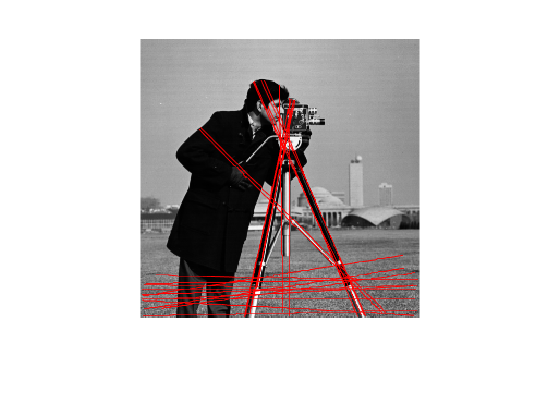

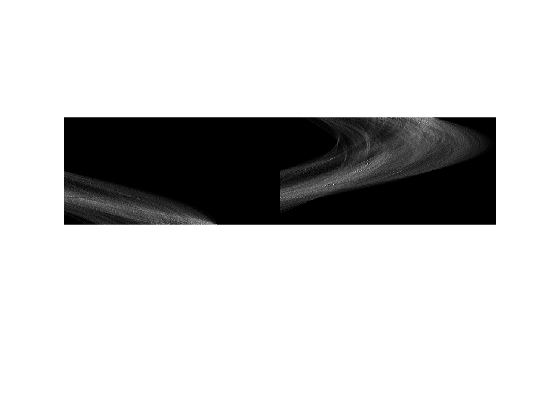

In [47]:
imshow(hough_voting,[])
thresh = 0.65*max(hough_voting(:));
figure
imshow(I,[])
hold on
[r1,c1] = find(hough_voting > thresh);
for i = 1:length(r1)
  polar = hough_axis{r1(i),c1(i)};
  plot(polar(2,:),polar(1,:),'r-')  
end
hold off

In [12]:
%matlab buildin hough transform function
I = imread('cameraman.tif');
% I = rgb2gray(I);
edgeI = edge(I,'canny');
% 对图像边缘进行hough变换，指定参数的分别率（取样间隔），区间利用默认值
[H,T,R] = hough(edgeI,'RhoResolution',0.5,'ThetaResolution',0.5);

In [20]:
size(T)
size(R)
size(H)


ans =

     1   360


ans =

           1        1445


ans =

        1445         360



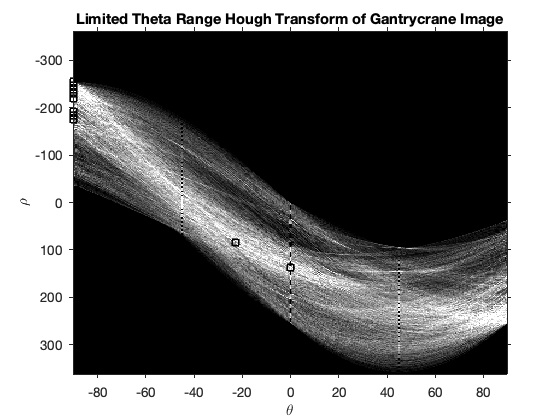

In [21]:
% 显示hough变换的结果
figure;
imshow(imadjust(mat2gray(H)),'XData',T,'YData',R,...
   'InitialMagnification','fit');
title('Limited Theta Range Hough Transform of Gantrycrane Image');
xlabel('\theta'), ylabel('\rho');
axis on, axis normal;
colormap(hot)

% 显示霍夫变换矩阵中的极值点
P = houghpeaks(H,10,'threshold',ceil(0.2*max(H(:)))); % 从霍夫变换矩阵H中提取50个极值点
x = T(P(:,2));%极值点的theta值，即P的第二列存放的是极值点的theta值
y = R(P(:,1));%极值点的rho值，即P的第二列存放的是极值点的rho值
hold on;plot(x,y,'s','color','black');

In [22]:

% 找原图中的直线
lines = houghlines(edgeI,T,R,P,'FillGap',18,'MinLength',80);

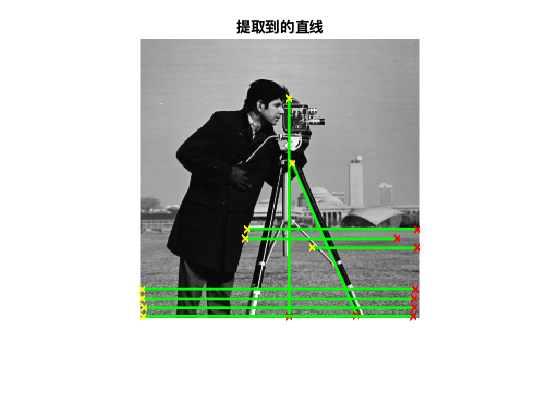

In [23]:
% 绘制提取得到的直线
figure, imshow(I), hold on
max_len = 0;
for k = 1:length(lines)
    % 绘制第k条直线
    xy = [lines(k).point1; lines(k).point2];
    plot(xy(:,1),xy(:,2),'LineWidth',2,'Color','green');

    % 绘制第k条直线的起点（黄色）、终点（红色）
    plot(xy(1,1),xy(1,2),'x','LineWidth',2,'Color','yellow');
    plot(xy(2,1),xy(2,2),'x','LineWidth',2,'Color','red');

    % 计算第k条直线的长度，保留最长直线的端点
    len = norm(lines(k).point1 - lines(k).point2);
    if ( len > max_len)
        max_len = len;
        xy_long = xy;
    end
end
title('提取到的直线');
